In [3]:
import utils.model as model_utils
import torch 

# 1. train model

  0%|          | 0/200 [00:00<?, ?it/s]

Loss: 0.4629
Loss: 0.3500
Loss: 0.3037
Loss: 0.2812
Loss: 0.2677
Loss: 0.2590
Loss: 0.2537
Loss: 0.2450
Loss: 0.2447
Loss: 0.2402
Loss: 0.2363
Loss: 0.2342
Loss: 0.2330
Loss: 0.2284
Loss: 0.2322
Loss: 0.2260
Loss: 0.2296
Loss: 0.2261
Loss: 0.2272
Loss: 0.2255
Loss: 0.2253
Loss: 0.2223
Loss: 0.2215
Loss: 0.2225
Loss: 0.2206
Loss: 0.2218
Loss: 0.2199
Loss: 0.2213
Loss: 0.2195
Loss: 0.2197
Loss: 0.2202
Loss: 0.2207
Loss: 0.2187
Loss: 0.2186
Loss: 0.2183
Loss: 0.2193
Loss: 0.2196
Loss: 0.2171
Loss: 0.2189
Loss: 0.2190
Loss: 0.2162
Loss: 0.2196
Loss: 0.2165
Loss: 0.2148
Loss: 0.2155
Loss: 0.2170
Loss: 0.2181
Loss: 0.2148
Loss: 0.2179
Loss: 0.2151
Loss: 0.2160
Loss: 0.2140
Loss: 0.2166
Loss: 0.2155
Loss: 0.2167
Loss: 0.2141
Loss: 0.2131
Loss: 0.2135
Loss: 0.2155
Loss: 0.2137
Loss: 0.2139
Loss: 0.2134
Loss: 0.2130
Loss: 0.2137
Loss: 0.2139
Loss: 0.2132
Loss: 0.2144
Loss: 0.2153
Loss: 0.2133
Loss: 0.2130
Loss: 0.2140
Loss: 0.2138
Loss: 0.2108
Loss: 0.2132
Loss: 0.2121
Loss: 0.2132
Loss: 0.2136

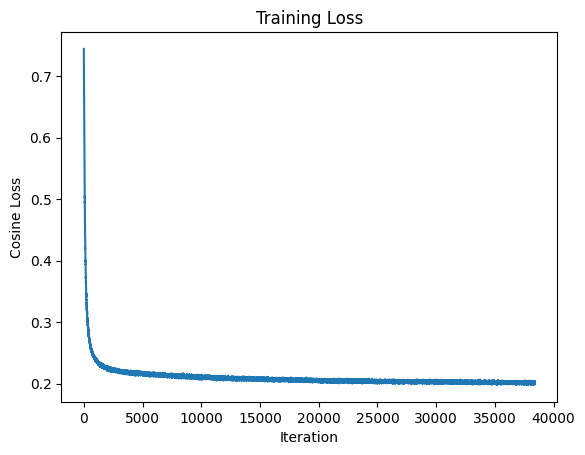

In [4]:
full_embeddings_l,full_embeddings_exp, mapped_embeddings = model_utils.load_embeddings()
train_loader = model_utils.get_dataloader(torch.concat((full_embeddings_l, full_embeddings_exp)))
model = model_utils.initialize_model()
model, losses = model_utils.train(model, train_loader)
model_utils.plot_losses(losses)
model_utils.save_model(model)


# 2. evaluate intrinsic

Average cosine similarity: 0.7939


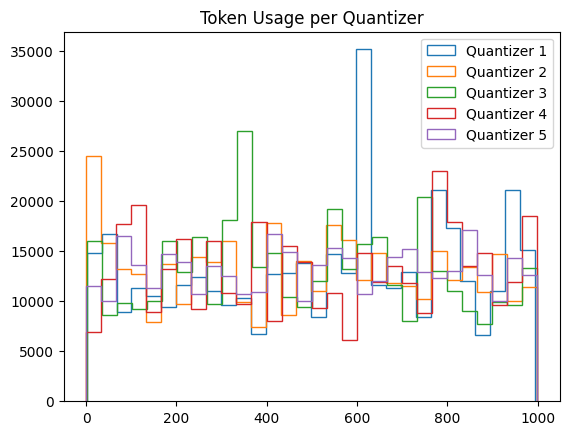

Unique token combination ratio, all: 0.7707142147661604
Average cosine similarity: 0.7986


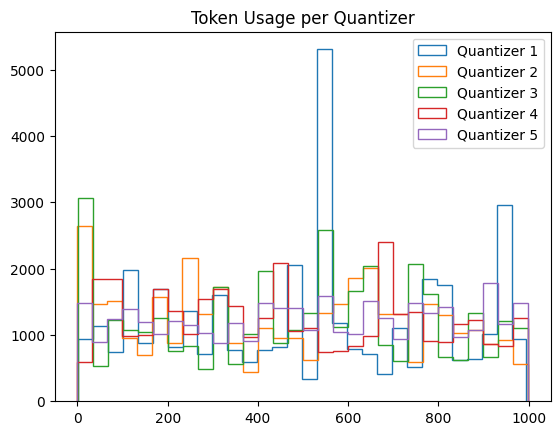

Unique token combination ratio, mapped: 0.8522942225585041


In [5]:
_, indices_all = model_utils.evaluate(model, full_embeddings_l)
model_utils.plot_histograms(indices_all, model_utils.Config.num_quantizers)

print("Unique token combination ratio, all:",
        torch.unique(indices_all, dim=0).shape[0] / indices_all.shape[0])

_, indices_mapped = model_utils.evaluate(model, mapped_embeddings)
model_utils.plot_histograms(indices_mapped, model_utils.Config.num_quantizers)

print("Unique token combination ratio, mapped:",
        torch.unique(indices_mapped, dim=0).shape[0] / indices_mapped.shape[0])